In [21]:
import pandas as pd
import ephem
import matplotlib.pyplot as plt
import pytz

In [22]:
# Function to calculate sun altitude using local time (PST)
def calculate_sun_altitude(lat, lon, timestamps):
    # Initialize observer
    observer = ephem.Observer()
    observer.lat = str(lat)
    observer.lon = str(lon)

    # Initialize the Sun object
    sun = ephem.Sun()

    # Store results
    altitude_data = []

    # Define timezone for PST
    pst = pytz.timezone("America/Los_Angeles")

    for timestamp in timestamps:
        # Convert the timestamp from PST to UTC
        local_time = pst.localize(timestamp)
        utc_time = local_time.astimezone(pytz.utc)
        
        # Set observer date in UTC
        observer.date = utc_time

        # Compute the position of the sun for the observer at the given time
        sun.compute(observer)

        # Altitude is in degrees (-90 to 90), where 90 is zenith and 0 is on the horizon
        altitude = sun.alt / ephem.degree  # Convert altitude to degrees

        # Set altitude below 0 to 0
        if altitude < 0:
            altitude = 0.0

        altitude_data.append(altitude)

    # Create a DataFrame with raw altitudes
    altitude_df = pd.DataFrame({'timestamp': timestamps, 'sun_altitude': altitude_data})

    # Normalize the altitude (max altitude is 90 degrees)
    altitude_df['normalized_sun_altitude'] = altitude_df['sun_altitude'] / 75.648184

    return altitude_df

# Latitude and longitude for the given location
lat, lon = 37.7897, -122.3972

# Generate 30-minute interval timestamps from Jun 21, 2023, to Jun 20, 2024 in local time (PST)
timestamps = pd.date_range(start="2023-06-21 15:00:00", end="2024-06-20 20:30:00", freq='30min')

# Calculate sun altitude for the entire time range
sun_altitude_df = calculate_sun_altitude(lat, lon, timestamps)

# Display the first few rows
print(sun_altitude_df.head())



            timestamp  sun_altitude  normalized_sun_altitude
0 2023-06-21 15:00:00     62.752643                 0.829533
1 2023-06-21 15:30:00     57.181135                 0.755882
2 2023-06-21 16:00:00     51.402054                 0.679488
3 2023-06-21 16:30:00     45.521336                 0.601751
4 2023-06-21 17:00:00     39.602817                 0.523513


In [23]:
sun_altitude_df.head(24)

,timestamp,sun_altitude,normalized_sun_altitude
0,2023-06-21 15:00:00,62.752643,0.829533
1,2023-06-21 15:30:00,57.181135,0.755882
2,2023-06-21 16:00:00,51.402054,0.679488
3,2023-06-21 16:30:00,45.521336,0.601751
4,2023-06-21 17:00:00,39.602817,0.523513
5,2023-06-21 17:30:00,33.690188,0.445354
6,2023-06-21 18:00:00,27.817665,0.367724
7,2023-06-21 18:30:00,22.015872,0.291030
8,2023-06-21 19:00:00,16.316159,0.215685
9,2023-06-21 19:30:00,10.754021,0.142158


In [24]:
sun_altitude_df.max()

timestamp                  2024-06-20 20:30:00
sun_altitude                         75.451454
normalized_sun_altitude               0.997399
dtype: object

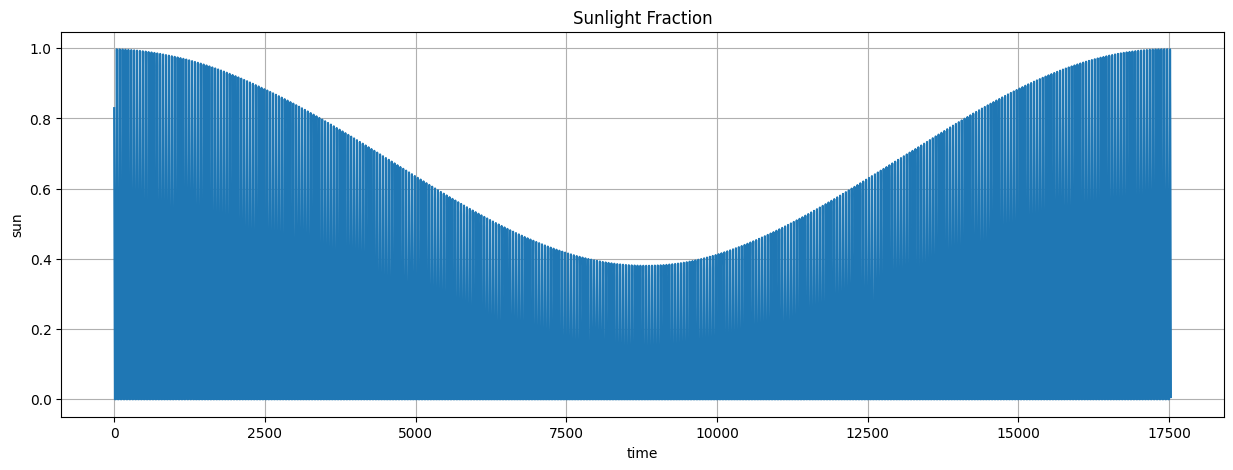

In [25]:
plt.figure(figsize=(15, 5))

plt.plot(sun_altitude_df.index, sun_altitude_df['normalized_sun_altitude'])
plt.title('Sunlight Fraction')
plt.xlabel('time')
plt.ylabel('sun')
plt.grid(True)
#my_dpi = 150
#plt.savefig("sturmflut_wind.png", dpi=my_dpi * 1)
plt.show()

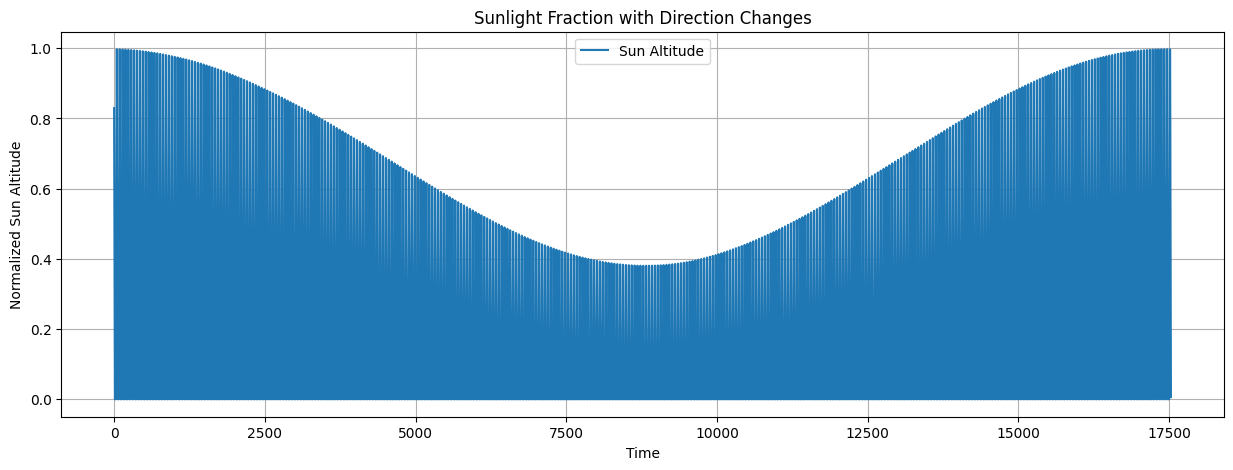

In [26]:
# Plot the data and overlay scatter plot for points where the direction changes
plt.figure(figsize=(15, 5))

# Plot the sun altitude data
plt.plot(sun_altitude_df.index, sun_altitude_df['normalized_sun_altitude'], label='Sun Altitude')

# Customize the plot
plt.title('Sunlight Fraction with Direction Changes')
plt.xlabel('Time')
plt.ylabel('Normalized Sun Altitude')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [28]:
sun_altitude_df.shape

(17532, 3)

In [29]:
# Save the result to a CSV
sun_altitude_df.to_csv('../data/normalized_sun_altitude_data_jun2023_to_jun2024.csv', index=True)